In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("output_Historic.csv")

In [4]:
dataset.shape

(900, 2)

In [5]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
p = PorterStemmer()

all_swords = stopwords.words('english')
all_swords.remove('not')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
corpus=[]



for i in range (0,900):
  review = re.sub('[^a-zA-Z]', ' ', dataset[' Review'][i])
  review = review.lower()
  review = review.split()
  review = [p.stem(word) for word in review if not word in set(all_swords)]
  review = ' '.join(review)
  corpus.append(review)

In [8]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)
# we pick thwe 1420 most used tokens

In [36]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [37]:
import pickle
bow_path = "Bag_of_Words_Sentiment_Model.pkl"
pickle.dump(cv, open(bow_path, "wb"))


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [40]:
import joblib
joblib.dump(classifier, 'classifier')

['classifier']

In [41]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[67 11]
 [38 64]]


0.7277777777777777

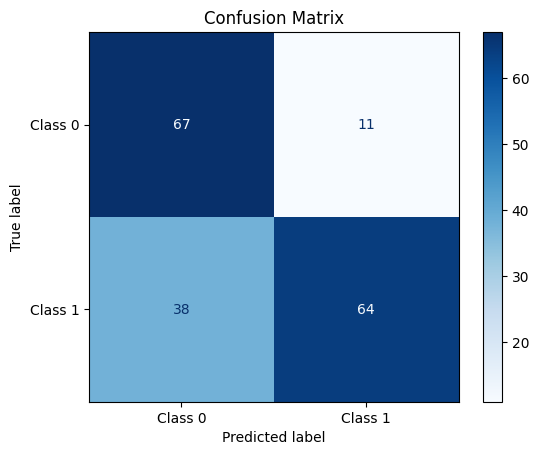

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1']) # replace with your class labels
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()